#Introducción

En este proyecto, usamos el dataset Fashion MNIST para construir un modelo de red neuronal convolucional (CNN) usando Keras y TensorFlow. Fashion MNIST es un dataset que contiene 70,000 imágenes en escala de grises de 10 categorías diferentes de ropa. Cada imagen tiene una resolución de 28x28 píxeles.

**Problema a Resolver**

El objetivo es clasificar estas imágenes en las categorías correspondientes (como camisetas, pantalones, vestidos, etc.) utilizando una CNN. Este tipo de modelo efectivo para el reconocimiento de patrones visuales en imágenes.

#Carga y visualizacion del dataset


Las imágenes siguientes muestran ejemplos del conjunto de entrenamiento del dataset Fashion MNIST. Cada imagen es una prenda de vestir de una de las 10 categorías diferentes. La visualización ayuda a entender los datos con los que estamos trabajando.

4422102/4422102 [==============================] - 0s 0us/step


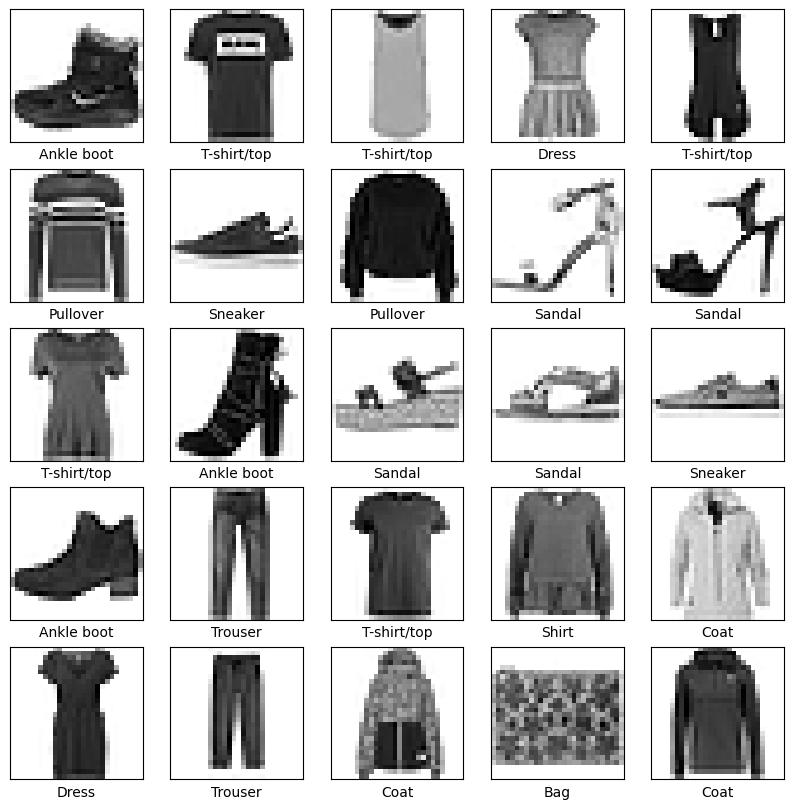

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Cargar el dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los valores de los píxeles
x_train, x_test = x_train / 255.0, x_test / 255.0

# Nombres de las clases del dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Mostrar las primeras 25 imágenes del conjunto de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()



#Construcción del modelo de la CNN

En esta parte, construimos la arquitectura de nuestra red neuronal convolucional. El modelo utiliza tres capas convolucionales (Conv2D) con una función de activación ReLU. Cada una seguida por una capa de pooling (MaxPooling2D) para reducir la dimensionalidad espacial. Luego, aplanamos la salida y la alimentamos a una red densamente conectada para la clasificación final en las 10 categorías. El modelo se compila con el optimizador Adam y la pérdida de entropía cruzada categórica dispersa, que es adecuada para clasificación multiclase.

In [2]:
from tensorflow.keras import layers, models

# Construcción del modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

#Entrenamiento del modelo

Antes de entrenar el modelo, redimensionamos los datos de entrada para agregar una dimensión de canal, necesaria para las capas convolucionales. Luego, entrenamos el modelo usando el conjunto de entrenamiento, con una validación en el conjunto de prueba. Este proceso nos ayudará a entender cómo se desempeña el modelo tanto en datos conocidos (entrenamiento) como desconocidos (validación).



In [3]:
# Redimensionar los datos para añadir una dimensión de canal
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Entrenamiento del modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 66s 34ms/step - loss: 0.5158 - accuracy: 0.8119 - val_loss: 0.3831 - val_accuracy: 0.8587
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3302 - accuracy: 0.8792 - val_loss: 0.3236 - val_accuracy: 0.8841
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2794 - accuracy: 0.8992 - val_loss: 0.2878 - val_accuracy: 0.8967
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2490 - accuracy: 0.9089 - val_loss: 0.2727 - val_accuracy: 0.8982
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2267 - accuracy: 0.9159 - val_loss: 0.2792 - val_accuracy: 0.8976
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2061 - accuracy: 0.9233 - val_loss: 0.2671 - val_accuracy: 0.9046
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1907 - accuracy: 0.9293 - val_loss: 0.2724 -

#Evaluación y Visualización del Desempeño

A continuación, se muestran las gráficas de precisión y pérdida a lo largo de las épocas de entrenamiento. Estas gráficas son cruciales para entender cómo el modelo aprende y cómo se desempeña con el tiempo, tanto en el conjunto de entrenamiento como en el de validación. Finalmente, evaluamos el modelo en el conjunto de prueba para obtener su precisión.

313/313 - 5s - loss: 0.2677 - accuracy: 0.9110 - 5s/epoch - 16ms/step

Test accuracy: 0.9110000133514404


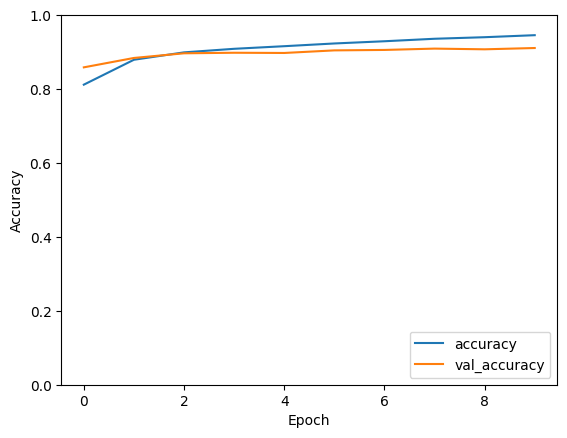

In [4]:
# Gráficas de precisión y pérdida
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)


# Grafica representativa del modelo


**Función plot_model de Keras:**

Propósito: La función plot_model genera un diagrama de la arquitectura de la red neuronal. Este diagrama muestra cómo están organizadas y conectadas las distintas capas del modelo.
Parámetros Clave:
model: Es el modelo de Keras que deseamos visualizar. En este caso, model es el nombre de nuestra red neuronal convolucional.
to_file: Este parámetro especifica el nombre del archivo donde se guardará la imagen de la arquitectura del modelo. Aquí se usa 'model_structure.png'.
show_shapes: Cuando se establece en True, la función muestra las dimensiones de entrada y salida de cada capa, lo que ayuda a entender el flujo de datos a través de la red.
show_layer_names: Si es True, se incluyen los nombres de cada capa en la visualización, lo que facilita la identificación de las capas específicas, especialmente en modelos complejos.

**Interpretación de la Gráfica:**

Capas y Conexiones: En la gráfica generada, cada caja representa una capa en el modelo. Las flechas entre las cajas indican cómo los datos fluyen de una capa a otra.
Forma de los Datos: Las dimensiones mostradas en cada capa (si show_shapes=True) ofrecen una perspectiva clara sobre cómo cambia la forma de los datos a medida que pasan por la red.
Análisis y Depuración: Esta visualización es particularmente útil para verificar la estructura del modelo, asegurarse de que las capas estén conectadas correctamente, y para la depuración general.

In [5]:
!pip install pydot graphviz



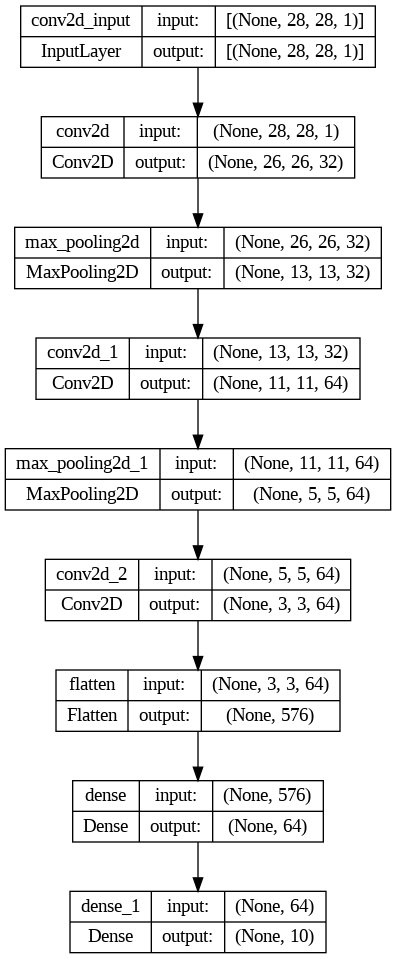

In [6]:
from tensorflow.keras.utils import plot_model

# Suponiendo que tu modelo se llama 'model'
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)




### Conceptos Teóricos en el Modelado y Entrenamiento de Redes Neuronales

Las redes neuronales son modelos computacionales diseñados para reconocer patrones complejos en grandes volúmenes de datos. Ahora vamos a explicar mas detalladamente algunos conceptos:

**1. Arquitectura de Redes Neuronales:**
   - **Neuronas y Capas:** Una red neuronal consta de unidades básicas llamadas neuronas, organizadas en capas. Hay capas de entrada (que reciben los datos), capas ocultas (que procesan los datos) y una capa de salida (que produce el resultado). La arquitectura de una red, incluido el número de capas y neuronas en cada capa, es fundamental y varía según la complejidad de la tarea.
   - **Redes Neuronales Convolucionales (CNN):** Estas redes están especializadas en procesar datos con una estructura de rejilla, como las imágenes. Las CNN utilizan capas convolucionales que contienen kernels o filtros.

**2. Kernels en CNN:**
   - **¿Qué son los Kernels?:** Los kernels son matrices pequeñas y aprendibles dentro de las capas convolucionales. Son fundamentales para detectar características en las imágenes, como bordes, texturas o patrones específicos.
   - **Funcionamiento de los Kernels:** Cada kernel se desliza sobre la imagen de entrada, realizando una operación de convolución. Esta operación implica la multiplicación elemento a elemento del kernel con la región de la imagen que está cubriendo, seguida de una suma de los resultados. Este proceso se repite a lo largo de toda la imagen, produciendo un mapa de características.

**3. Propagación Hacia Adelante y Retropropagación:**
   - **Propagación Hacia Adelante:** Los datos de entrada pasan a través de la red, capa por capa, hasta generar una salida.
   - **Retropropagación:** Es el proceso mediante el cual la red aprende de los errores, ajustando los pesos sinápticos, incluyendo los valores de los kernels, para minimizar la diferencia entre la salida prevista y la real.

**4. Funciones de Activación y Optimización:**
   - **Funciones de Activación:** Transforman la entrada de la neurona en su salida. Ejemplos comunes son ReLU, sigmoid y tanh.
   - **Función de Pérdida y Optimizadores:** La función de pérdida mide el error del modelo, y los optimizadores como SGD o Adam ajustan los pesos y kernels del modelo para minimizar esta pérdida.

**5. Prevención del Sobreajuste:**
   - Técnicas como la validación cruzada, el dropout y la regularización son esenciales para evitar que el modelo aprenda demasiado los detalles y el ruido de los datos de entrenamiento.

**6. Hiperparámetros:**
   - Incluyen la tasa de aprendizaje, número de epochs, tamaño del batch, entre otros. La elección adecuada de estos parámetros es vital para el rendimiento del modelo.




In [7]:
model.save('modeloChona.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
